In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime

PATH = 'D:\\DA\\TestTasks\\AlfaBank\\'

# Чтение и анализ данных

In [2]:
transactions = pd.read_csv(PATH + 'transactions.csv')
transactions.head(10)

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN
5,39026145,2 15:53:49,5541,1010,-14643.37,NaN
6,39026145,3 15:29:08,5499,1010,-1010.66,NaN
7,39026145,4 12:11:57,5200,1010,-2829.85,NaN
8,39026145,5 15:19:19,5499,1010,-628.86,NaN
9,39026145,6 07:08:31,4814,1030,-5614.79,NaN


In [3]:
transactions.shape

(6849346, 6)

In [4]:
transactions.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6849346 entries, 0 to 6849345
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   customer_id  6849346 non-null  int64  
 1   tr_datetime  6849346 non-null  object 
 2   mcc_code     6849346 non-null  int64  
 3   tr_type      6849346 non-null  int64  
 4   amount       6849346 non-null  float64
 5   term_id      4084151 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 313.5+ MB


У признака **term_id** есть пропущенные значения:

In [5]:
print("Процент пропущенных значений для признака term_id: {0:.1%}" \
          .format(transactions['term_id'].isna().sum() / transactions.shape[0]))

Процент пропущенных значений для признака term_id: 40.4%


Посмотрим на значения признака **tr_datetime**:

In [6]:
transactions['tr_datetime'].tail(20)

6849326    445 13:44:21
6849327    445 13:58:48
6849328    445 20:22:03
6849329    446 19:04:27
6849330    446 19:19:25
6849331    447 07:22:13
6849332    448 20:25:26
6849333    450 16:37:55
6849334    451 11:12:53
6849335    452 11:52:41
6849336    452 12:10:49
6849337    452 15:37:48
6849338    452 15:53:52
6849339    452 17:43:16
6849340    452 19:33:04
6849341    453 16:03:02
6849342    454 10:54:60
6849343    454 14:23:59
6849344    454 16:11:53
6849345    454 18:06:30
Name: tr_datetime, dtype: object

В выборке есть данные за 454 дня. Чтобы с этим признаком было удобно работать, необходимо его преобразовать:

In [7]:
transactions['day'] = transactions['tr_datetime'].map(lambda x: x.split()[0]).astype(int)
transactions['time'] = pd.to_datetime(transactions['tr_datetime'].map(lambda x: x.split()[1]), format='%H:%M:%S')

In [8]:
transactions['hour'] = transactions['time'].dt.hour
transactions['min'] = transactions['time'].dt.minute
transactions['sec'] = transactions['time'].dt.second

In [9]:
transactions.drop(['tr_datetime', 'time'], axis=1, inplace=True)

In [10]:
transactions.sample(10)

,customer_id,mcc_code,tr_type,amount,term_id,day,hour,min,sec
74348,83805343,6011,2010,-13475.49,690226,447,15,31,46
591849,63697046,4814,1030,-2245.92,888996,226,10,33,38
2020344,7999570,4829,2370,-4491.83,NaN,54,16,58,56
2435043,10845911,6010,7071,336887.37,NaN,193,14,31,56
974899,74921898,6011,7010,22459.16,956452,373,14,58,32
1720832,13637343,5331,1010,-2066.69,10264836,385,12,57,8
72547,71946204,6011,2010,-65131.56,258579,424,10,29,54
6698657,14209820,6010,7030,56147.89,412586,374,18,39,41
2877595,28641319,4829,2371,-291969.05,888912,432,15,12,1
782267,61133128,6011,2010,-673774.73,470343,210,18,30,35


Посмотрим на количество уникальных значений по каждому признаку:

In [11]:
transactions.nunique()

customer_id     15000
mcc_code          184
tr_type            77
amount         342246
term_id        440338
day               457
hour               24
min                60
sec                60
dtype: int64

Посмотрим на другие имеющиеся данные:

In [12]:
# Типы транзакций 
tr_types = pd.read_csv(PATH + 'tr_types.csv', sep=';')
tr_types.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [13]:
tr_types.shape

(155, 2)

In [14]:
# MCC-Коды транзакций 
mcc_codes = pd.read_csv(PATH + 'tr_mcc_codes.csv', sep=';')
mcc_codes.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [15]:
mcc_codes.shape

(184, 2)

In [16]:
# Информация по полу клиентов
gender = pd.read_csv(PATH + 'gender_train.csv')
gender.head()

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


In [17]:
gender.shape

(8400, 2)

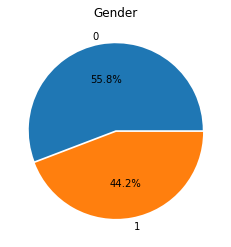

In [18]:
plt.pie(gender['gender'].value_counts(), labels=gender['gender'].value_counts().index, \
            autopct="%0.1f%%", explode = [0.01, 0.01]);
plt.title("Gender");

Есть небольшой дисбаланс классов.

In [19]:
# Пример решения
submission = pd.read_csv(PATH + 'gender_test_kaggle_sample_submission.csv', sep=',')
submission.head()

,customer_id,probability
0,75562265,0.152664
1,84816985,0.302357
2,54129921,0.062036
3,23160845,0.459860
4,45646491,0.835253


In [20]:
submission.shape

(3600, 2)

# Очистка и преобразование данных

Заметим, что значение целевой переменной **gender** известно для **8400** клиентов, и нужно предсказать его для **3600** клиентов. Проверим количество клиентов, по которым у нас есть данные о транзакциях:

In [21]:
transactions['customer_id'].nunique()

15000

Проверим, что id клиентов, по поторым нужно сделать предсказания, не пересекаются с id клиентов, пол которых нам точно известен:

In [22]:
train_id = set(gender['customer_id'].unique())
test_id = set(submission['customer_id'].unique())
print("Есть пересечения" if len(train_id.intersection(test_id)) else "Пересечений нет")
all_id = train_id.union(test_id)

Пересечений нет


Можем удалить записи о транзакциях клиентов, пол которых нам не известен и делать предсказания для которых нам не нужно:

In [23]:
transactions = transactions[transactions['customer_id'].isin(all_id)]
print("Осталось клиентов в данных о транзакциях: ", transactions['customer_id'].nunique())
transactions.shape

Осталось клиентов в данных о транзакциях:  12000


(5393337, 9)

Посмотрим на суммы транзакций:

In [24]:
transactions['amount'].describe()

count    5.393337e+06
mean    -2.106074e+04
std      4.873910e+05
min     -1.459845e+08
25%     -2.245916e+04
50%     -5.614790e+03
75%     -1.122960e+03
max      1.459845e+08
Name: amount, dtype: float64

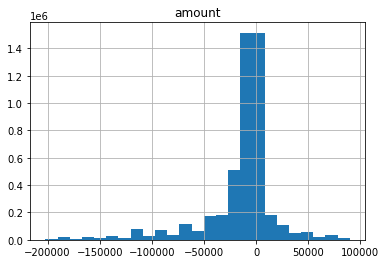

In [25]:
# Для построения гистограммы избавимся от выбросов 
q_05 = transactions['amount'].quantile(0.05)
q_95 = transactions['amount'].quantile(0.95)
plt.title('amount')
transactions['amount'][(transactions['amount'] < q_95) & (transactions['amount'] > q_05)].hist(bins=25);

Имеются как положительные, так и отрицательные суммы транзакций.

In [31]:
transactions['amount'][transactions['amount'] > 0].value_counts()

22459.16     48872
112295.79    40972
44918.32     33128
67377.47     26026
11229.58     25485
             ...  
4531.14          1
5155.72          1
29461.92         1
18126.56         1
36331.06         1
Name: amount, Length: 67810, dtype: int64

In [32]:
transactions['amount'][transactions['amount'] < 0].value_counts()

-2245.92     318361
-1122.96     160361
-11229.58    156721
-22459.16    154512
-4491.83     138945
              ...  
-39324.41         1
-39530.59         1
-39311.16         1
-24592.55         1
-36331.06         1
Name: amount, Length: 225744, dtype: int64

Вызывает удивление тот факт, что наиболее часто встречаются не "круглые" суммы. Можно заметить, что самые часто встречающиеся суммы как-то связаны друг с другом: 22459.16 = 112295.79 / 5, 44918.32 = 22459.16 * 2 и т.д.

Найдем минимальную по модулю сумму транзакции:

In [33]:
np.abs(transactions['amount']).min()

0.22

Вероятно, это значение может соответствовать сумме 0.01 руб. Чтобы перейти к значениям в этом масштабе, поделим суммы транзакций на (11.229579 * 2):

In [34]:
transactions['amount_norm'] = np.round(transactions['amount'] / (11.229579 * 2), 2)

In [35]:
transactions['amount_norm'][transactions['amount_norm'] > 0].value_counts()

1000.00    48872
5000.00    40972
2000.00    33128
3000.00    26026
500.00     25485
           ...  
2393.56        1
438.55         1
241.82         1
240.18         1
1309.03        1
Name: amount_norm, Length: 67810, dtype: int64

In [36]:
transactions['amount_norm'][transactions['amount_norm'] < 0].value_counts()

-100.00      318361
-50.00       160361
-500.00      156721
-1000.00     154512
-200.00      138945
              ...  
-4669.56          1
-4670.06          1
-54676.60         1
-7825.54          1
-1269.12          1
Name: amount_norm, Length: 225744, dtype: int64

In [37]:
transactions.sample(10)

,customer_id,mcc_code,tr_type,amount,term_id,day,hour,min,sec,amount_norm
2257581,46557366,5411,1010,-3066.12,022084,336,13,3,48,-136.52
853149,17389182,5812,1210,-138644.87,NaN,217,0,0,0,-6173.20
3262148,49288762,6010,7030,1527.22,547301,235,13,40,19,68.00
5071261,36671915,5411,1010,-4386.72,10132451,328,6,21,7,-195.32
2626753,52275965,4814,1030,-2245.92,NaN,112,20,29,38,-100.00
225876,85614078,5411,1110,-15536.80,NaN,106,22,2,8,-691.78
3370522,70490446,5983,1010,-54413.37,644366,354,21,55,31,-2422.77
4111314,96637590,5995,1010,-9215.22,NaN,103,14,20,23,-410.31
1038113,94503917,6011,2010,-406510.75,481875,280,12,45,47,-18100.00
539992,26409535,4829,2331,-561478.94,NaN,54,10,20,20,-25000.00


Видно, что бОльшая часть сумм в результате такого преобразования выглядит реалистично.

В рамках данной задачи знание значений сумм в исходной валюте вряд-ли может быть полезным, но если бы задача была иной, это могло бы представлять ценность.

# Генерация новых признаков

Посмотрим на наиболее частые типы транзакций для положительных и для отрицательных сумм:

In [522]:
transactions[transactions['amount'] > 0]['tr_type'].value_counts()[:20]

7070    519731
7010    206404
7030    113683
7071     59262
7031     24715
6110     15756
7020     11860
7011      8763
7021      6440
6200      3333
7074      2035
7014      1847
6010      1565
6100      1557
1110      1022
7034       656
1100       594
6210       416
7075       390
7040       186
Name: tr_type, dtype: int64

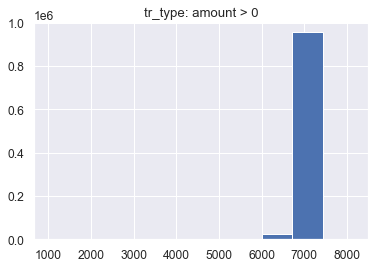

In [523]:
plt.title('tr_type: amount > 0')
transactions[transactions['amount'] > 0]['tr_type'].hist();

In [524]:
transactions[transactions['amount'] < 0]['tr_type'].value_counts()[:20]

1010    1270049
2010     832367
1030     778663
1110     732893
2370     289834
1100      95079
1200      73866
2330      56367
2371      50527
4071      50524
2011      50492
4010      25910
2331      16478
4051      16474
1210      16286
2020      10466
4011       9827
2110       7432
4110       7404
2320       3983
Name: tr_type, dtype: int64

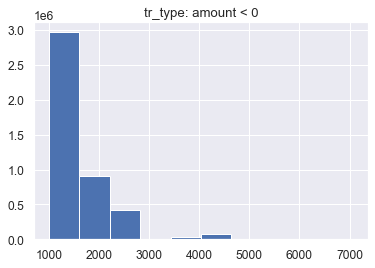

In [525]:
plt.title('tr_type: amount < 0')
transactions[transactions['amount'] < 0]['tr_type'].hist();

Основываясь на этих данных и на информации о типах транзакций из предоставленного документа, можем полагать, что транзакции с типами 7xxx - это доходы клиента, а 1xxx...5xxx - его расходы:

In [526]:
# Расходы по клиентам
exp_df = transactions[(transactions['tr_type'] >= 1000) & (transactions['tr_type'] < 5000)] \
    .groupby('customer_id', as_index=False).agg({'amount': 'sum'}).rename(columns={'amount': 'expenses'})
exp_df.head()

,customer_id,expenses
0,6815,-3956007.97
1,22899,-6448719.64
2,27914,-3386906.52
3,28753,-72253691.83
4,31385,-3431338.03


In [527]:
# Доходы по клиентам
inc_df = transactions[(transactions['tr_type'] >= 7000) & (transactions['tr_type'] < 8000)] \
    .groupby('customer_id', as_index=False).agg({'amount': 'sum'}).rename(columns={'amount': 'income'})
inc_df.head()

,customer_id,income
0,6815,2706553.10
1,22899,5818923.05
2,27914,409879.70
3,28753,45593617.40
4,31385,937669.86


Посчитаем количество транзакций для каждого клиента:

In [528]:
count_df = transactions.groupby('customer_id', as_index=False).agg({'amount': 'count'}).rename(columns={'amount': 'sum'})
count_df.head()

,customer_id,sum
0,6815,226
1,22899,234
2,27914,111
3,28753,294
4,31385,365


Добавим данные о доходах и расходах каждого клиента:

In [529]:
count_df = count_df.merge(inc_df, on='customer_id', how='outer').merge(exp_df, on='customer_id', how='outer').fillna(0)
count_df.head()

,customer_id,sum,income,expenses
0,6815,226,2706553.10,-3956007.97
1,22899,234,5818923.05,-6448719.64
2,27914,111,409879.70,-3386906.52
3,28753,294,45593617.40,-72253691.83
4,31385,365,937669.86,-3431338.03


Добавим еще один признак: разница между доходами и расходами клиента:

In [530]:
count_df['delta'] = count_df['income'] + count_df['expenses']
count_df.head()

,customer_id,sum,income,expenses,delta
0,6815,226,2706553.10,-3956007.97,-1249454.87
1,22899,234,5818923.05,-6448719.64,-629796.59
2,27914,111,409879.70,-3386906.52,-2977026.82
3,28753,294,45593617.40,-72253691.83,-26660074.43
4,31385,365,937669.86,-3431338.03,-2493668.17


Добавим новые признаки в данные о транзакциях: день недели, в который произошла транзакция. Точный день недели мы не знаем, но определить одинаковые дни недели не представляет труда:

In [531]:
transactions['weekday'] = transactions['day'] % 7 + 1
transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,hour,min,sec,amount_norm,weekday,daypart
0,39026145,4814,1030,-2245.92,NaN,0,10,23,26,-100.0,1,3
1,39026145,6011,7010,56147.89,NaN,1,10,19,29,2500.0,2,3
2,39026145,4829,2330,-56147.89,NaN,1,10,20,56,-2500.0,2,3
3,39026145,5499,1010,-1392.47,NaN,1,10,39,54,-62.0,2,3
4,39026145,5499,1010,-920.83,NaN,2,15,33,42,-41.0,3,4


Теперь можем посчитать для каждого клиента количество его транзакций по дням недели:

In [532]:
trans_pivot_weekday = pd.pivot_table(transactions, values='amount', \
                             columns=['weekday'], index=['customer_id'], aggfunc='count'). \
                             rename(columns={'count': 'freq'}).reset_index().fillna(0)
clmns = trans_pivot_weekday.columns
trans_pivot_weekday.columns = [clmns[0]] + ['wd_'+ str(col)+'_freq' for col in clmns[1:]]
trans_pivot_weekday.head()

,customer_id,wd_1_freq,wd_2_freq,wd_3_freq,wd_4_freq,wd_5_freq,wd_6_freq,wd_7_freq
0,6815,27.0,30.0,27.0,37.0,41.0,33.0,31.0
1,22899,31.0,33.0,21.0,32.0,42.0,40.0,35.0
2,27914,15.0,29.0,20.0,10.0,15.0,3.0,19.0
3,28753,65.0,15.0,18.0,63.0,48.0,44.0,41.0
4,31385,56.0,44.0,53.0,45.0,53.0,61.0,53.0


Аналогичным образом определим время суток для каждой тразакции (разделим каждые сутки на 6 частей) и посчитаем для каждого клиента количество его транзакций в каждую из 6 частей суток:

In [533]:
transactions['daypart'] = transactions['hour'] // 4 + 1
transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,hour,min,sec,amount_norm,weekday,daypart
0,39026145,4814,1030,-2245.92,NaN,0,10,23,26,-100.0,1,3
1,39026145,6011,7010,56147.89,NaN,1,10,19,29,2500.0,2,3
2,39026145,4829,2330,-56147.89,NaN,1,10,20,56,-2500.0,2,3
3,39026145,5499,1010,-1392.47,NaN,1,10,39,54,-62.0,2,3
4,39026145,5499,1010,-920.83,NaN,2,15,33,42,-41.0,3,4


In [534]:
trans_pivot_daypart = pd.pivot_table(transactions, values='amount', \
                             columns=['daypart'], index=['customer_id'], aggfunc='count'). \
                             rename(columns={'count': 'freq'}).reset_index().fillna(0)
clmns = trans_pivot_daypart.columns
trans_pivot_daypart.columns = [clmns[0]] + ['daypart_'+ str(col)+'_freq' for col in clmns[1:]]
trans_pivot_daypart.head()

,customer_id,daypart_1_freq,daypart_2_freq,daypart_3_freq,daypart_4_freq,daypart_5_freq,daypart_6_freq
0,6815,2.0,3.0,95.0,86.0,31.0,9.0
1,22899,17.0,4.0,81.0,61.0,51.0,20.0
2,27914,3.0,11.0,45.0,28.0,24.0,0.0
3,28753,84.0,79.0,97.0,30.0,3.0,1.0
4,31385,11.0,16.0,90.0,85.0,76.0,87.0


Посчитаем для каждого клиента количество транзакций и их среднюю сумму: по типам транзакций и по различным MCC-кодам:

In [535]:
trans_pivot_tr_type = pd.pivot_table(transactions, values='amount', \
                             columns=['tr_type'], index=['customer_id'], aggfunc=[np.mean, 'count']). \
                             rename(columns={'count': 'freq'}).reset_index().fillna(0)

trans_pivot_mcc = pd.pivot_table(transactions, values='amount', \
                             columns=['mcc_code'], index=['customer_id'], aggfunc=[np.mean, 'count']). \
                             rename(columns={'count': 'freq'}).reset_index().fillna(0)

In [536]:
trans_pivot_tr_type.columns = ['tr_' + x + '_' + str(y) for (x, y) in trans_pivot_tr_type.columns]
trans_pivot_mcc.columns = ['mcc_' + x + '_' + str(y) for (x, y) in trans_pivot_mcc.columns]

trans_pivot_tr_type.rename(columns={'tr_customer_id_' : 'customer_id'}, inplace=True)
trans_pivot_mcc.rename(columns={'mcc_customer_id_' : 'customer_id'}, inplace=True)

In [537]:
# Количество и средняя сумма транзакции по типам
trans_pivot_tr_type.head()

,customer_id,tr_mean_1000,tr_mean_1010,tr_mean_1030,tr_mean_1100,tr_mean_1110,tr_mean_1200,tr_mean_1210,tr_mean_1310,tr_mean_1410,...,tr_freq_7040,tr_freq_7041,tr_freq_7044,tr_freq_7070,tr_freq_7071,tr_freq_7074,tr_freq_7075,tr_freq_8100,tr_freq_8145,tr_freq_8146
0,6815,0.0,-7627.253810,-2770.465889,0.000000e+00,-9703.427778,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22899,0.0,-6237.096667,-3737.740213,0.000000e+00,-10555.671852,-763.61,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,3.0,0.0,1.0,0.0,0.0,0.0
2,27914,0.0,0.000000,-2896.459828,0.000000e+00,-6731.460000,-22158.09,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28753,0.0,-129090.968764,-6647.909200,-1.937125e+06,-66132.496154,0.00,0.0,0.0,0.0,...,1.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31385,0.0,-6110.220533,-2921.307760,0.000000e+00,-11946.789467,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [538]:
# Количество и средняя сумма транзакции по MCC-кодам
trans_pivot_mcc.head()

,customer_id,mcc_mean_742,mcc_mean_1711,mcc_mean_1731,mcc_mean_1799,mcc_mean_2741,mcc_mean_3000,mcc_mean_3351,mcc_mean_3501,mcc_mean_4111,...,mcc_freq_8299,mcc_freq_8398,mcc_freq_8641,mcc_freq_8699,mcc_freq_8999,mcc_freq_9211,mcc_freq_9222,mcc_freq_9311,mcc_freq_9399,mcc_freq_9402
0,6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,31385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Для перехода от абсолютного количества транзакций по различным типам к их относительному количеству вычислим общее число транзакций для каждого клиента:

In [539]:
# Первый и последний день, в котором есть транзакция у клиента
day_df = transactions.groupby('customer_id', as_index=False).agg({'day': ['min', 'max']})

# За какой период в днях есть статистика по данному клиенту
day_df['days_count'] = day_df[('day', 'max')] - day_df[('day', 'min')] + 1
day_df.head()

customer_id day      days_count
              min  max           
0        6815  10  454        445
1       22899   1  456        456
2       27914  13  451        439
3       28753   0  452        453
4       31385   0  436        437

In [540]:
# Добавим кол-во дней, за которые были транзакции у клиента, к формируемому датасету
count_df = count_df.merge(day_df.iloc[:, [0,3]], on='customer_id', how='outer')
count_df.columns = ['customer_id', 'sum', 'income', 'expenses', 'delta', 'days_count'] #'ratio',
count_df.head()

C:\Div\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,customer_id,sum,income,expenses,delta,days_count
0,6815,226,2706553.10,-3956007.97,-1249454.87,445
1,22899,234,5818923.05,-6448719.64,-629796.59,456
2,27914,111,409879.70,-3386906.52,-2977026.82,439
3,28753,294,45593617.40,-72253691.83,-26660074.43,453
4,31385,365,937669.86,-3431338.03,-2493668.17,437


Добавим новый признак: среднее количество транзакций клиента за день, а также перейдем от абсолютных величин доходов / расходов к их средним значениям за день:

In [541]:
count_df['trans_freq'] = count_df['sum'] / count_df['days_count']
count_df['expenses'] = count_df['expenses'] / count_df['days_count']
# Данный признак не оказал позитивного влияния на качество модели
count_df['income'] = count_df['income'] / count_df['days_count']
count_df.drop(['days_count', 'income'], axis=1, inplace=True)
count_df.head()

,customer_id,sum,expenses,delta,trans_freq
0,6815,226,-8889.905551,-1249454.87,0.507865
1,22899,234,-14141.929035,-629796.59,0.513158
2,27914,111,-7715.049021,-2977026.82,0.252847
3,28753,294,-159500.423466,-26660074.43,0.649007
4,31385,365,-7852.032105,-2493668.17,0.835240


Объединим все данные в один датасет:

In [542]:
data_all = gender.merge(trans_pivot_tr_type, how='outer', on='customer_id') \
            .merge(trans_pivot_mcc, how='outer', on='customer_id').merge(count_df, how='outer', on='customer_id') \
            .merge(trans_pivot_daypart, on='customer_id', how='outer') \
# Информация о статистике транзакций клиента по дням недели не оказала позитивного влияния на итоговую модель
            #.merge(trans_pivot_weekday, on='customer_id', how='outer')

In [543]:
data_all.head()

,customer_id,gender,tr_mean_1000,tr_mean_1010,tr_mean_1030,tr_mean_1100,tr_mean_1110,tr_mean_1200,tr_mean_1210,tr_mean_1310,...,sum,expenses,delta,trans_freq,daypart_1_freq,daypart_2_freq,daypart_3_freq,daypart_4_freq,daypart_5_freq,daypart_6_freq
0,10928546,1.0,0.0,-429888.803286,-25470.167802,-39078.935000,-519345.032241,-51283.99,-193227.018873,0.0,...,723,-1.636168e+06,-7.054067e+08,1.585526,138.0,6.0,249.0,235.0,83.0,12.0
1,69348468,1.0,0.0,-5659.950290,-15541.803913,-2919.693333,-15446.149455,0.00,0.000000,0.0,...,438,-1.278606e+04,-5.743734e+06,0.958425,6.0,42.0,88.0,196.0,66.0,40.0
2,61009479,0.0,0.0,-7496.004127,-3150.699524,-4108.156111,-14747.864737,0.00,0.000000,0.0,...,471,-1.280173e+04,-3.303320e+05,1.080275,35.0,140.0,181.0,95.0,20.0,0.0
3,74045822,0.0,0.0,-22783.065417,-4965.720500,-1058.788571,-12970.657500,-1325.09,0.000000,0.0,...,166,-1.155475e+04,-3.671074e+06,0.457300,8.0,8.0,26.0,62.0,40.0,22.0
4,27979606,1.0,0.0,-8483.856552,-2500.026571,0.000000,-11808.669474,0.00,0.000000,0.0,...,153,-7.886703e+03,-2.020197e+06,0.590734,19.0,11.0,46.0,25.0,43.0,9.0


Перейдем от абсолютных значений количества транзакций клиента к их доле от всех его транзакций:

In [544]:
cols_to_freq = [col for col in data_all.columns if (('_freq_' in col) or ('daypart_' in col))]
for col in cols_to_freq:
    data_all[col] = data_all[col] / data_all['sum']

In [545]:
data_all.drop('sum', axis=1, inplace=True)
data_all.head()

,customer_id,gender,tr_mean_1000,tr_mean_1010,tr_mean_1030,tr_mean_1100,tr_mean_1110,tr_mean_1200,tr_mean_1210,tr_mean_1310,...,mcc_freq_9402,expenses,delta,trans_freq,daypart_1_freq,daypart_2_freq,daypart_3_freq,daypart_4_freq,daypart_5_freq,daypart_6_freq
0,10928546,1.0,0.0,-429888.803286,-25470.167802,-39078.935000,-519345.032241,-51283.99,-193227.018873,0.0,...,0.0,-1.636168e+06,-7.054067e+08,1.585526,0.190871,0.008299,0.344398,0.325035,0.114799,0.016598
1,69348468,1.0,0.0,-5659.950290,-15541.803913,-2919.693333,-15446.149455,0.00,0.000000,0.0,...,0.0,-1.278606e+04,-5.743734e+06,0.958425,0.013699,0.095890,0.200913,0.447489,0.150685,0.091324
2,61009479,0.0,0.0,-7496.004127,-3150.699524,-4108.156111,-14747.864737,0.00,0.000000,0.0,...,0.0,-1.280173e+04,-3.303320e+05,1.080275,0.074310,0.297240,0.384289,0.201699,0.042463,0.000000
3,74045822,0.0,0.0,-22783.065417,-4965.720500,-1058.788571,-12970.657500,-1325.09,0.000000,0.0,...,0.0,-1.155475e+04,-3.671074e+06,0.457300,0.048193,0.048193,0.156627,0.373494,0.240964,0.132530
4,27979606,1.0,0.0,-8483.856552,-2500.026571,0.000000,-11808.669474,0.00,0.000000,0.0,...,0.0,-7.886703e+03,-2.020197e+06,0.590734,0.124183,0.071895,0.300654,0.163399,0.281046,0.058824


# Оценка влияния добавленных признаков

Делим данные на **train** и **test** в зависимости от наличия значения признака **gender**:

In [546]:
data_train = data_all[~data_all['gender'].isna()]
data_test = data_all[data_all['gender'].isna()]

Посмотрим на влияние сгенерированных признаков на целевую переменную:

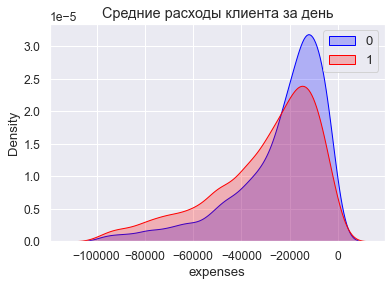

In [547]:
sns.kdeplot(data_train[np.abs(data_train['expenses']) < 100000]['expenses'][data_train['gender'] == 0], \
            color='blue', label=0, shade=True)
sns.kdeplot(data_train[np.abs(data_train['expenses']) < 100000]['expenses'][data_train['gender'] == 1], \
            color='red', label=1, shade=True)
sns.set(font_scale=1.2)
plt.title('Средние расходы клиента за день')
plt.legend();

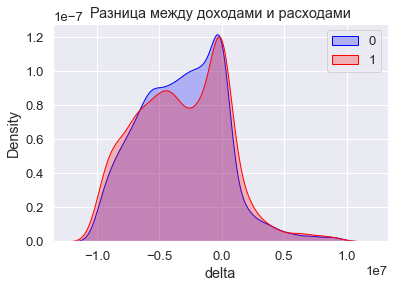

In [548]:
sns.kdeplot(data_train[np.abs(data_train['delta']) < 10000000]['delta'][data_train['gender'] == 0], \
            color='blue', label=0, shade=True);
sns.kdeplot(data_train[np.abs(data_train['delta']) < 10000000]['delta'][data_train['gender'] == 1], \
            color='red', label=1, shade=True);
plt.title('Разница между доходами и расходами')
plt.legend();

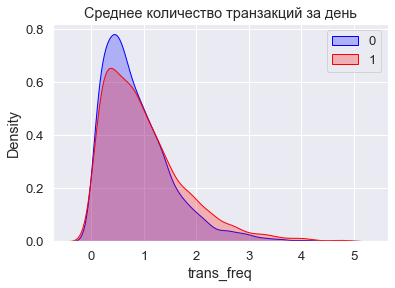

In [549]:
sns.kdeplot(data_train[np.abs(data_train['trans_freq']) < 5]['trans_freq'][data_train['gender'] == 0], \
            color='blue', label=0, shade=True);
sns.kdeplot(data_train[np.abs(data_train['trans_freq']) < 5]['trans_freq'][data_train['gender'] == 1], \
            color='red', label=1, shade=True);
plt.title('Среднее количество транзакций за день')
plt.legend();

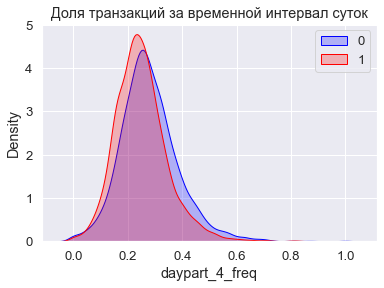

In [550]:
sns.kdeplot(data_train[np.abs(data_train['daypart_4_freq']) < 5]['daypart_4_freq'][data_train['gender'] == 0], \
            color='blue', label=0, shade=True);
sns.kdeplot(data_train[np.abs(data_train['daypart_4_freq']) < 5]['daypart_4_freq'][data_train['gender'] == 1], \
            color='red', label=1, shade=True);
plt.title('Доля транзакций за временной интервал суток')
plt.legend();

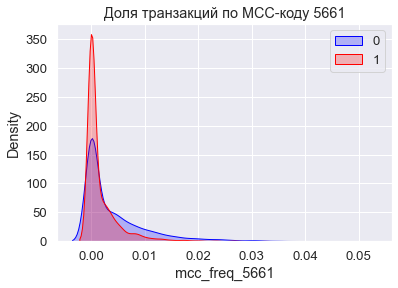

In [552]:
sns.kdeplot(data_train[data_train['mcc_freq_5661'] < 0.05]['mcc_freq_5661'][data_train['gender'] == 0], \
            color='blue', label=0, shade=True);
sns.kdeplot(data_train[data_train['mcc_freq_5661'] < 0.05]['mcc_freq_5661'][data_train['gender'] == 1], \
            color='red', label=1, shade=True);
plt.title('Доля транзакций по MCC-коду 5661')
plt.legend();

Можно убедиться, что введенные признаки оказывают влияние на целевую переменную.

# Финальная подготовка данных

Таким образом, финальная модель содержит следующие признаки для каждого клиента:
- Средние значения сумм и частоты транзакций по типам
- Средние значения сумм и частоты транзакций по MCC-кодам
- Средний расход клиента в пересчете на 1 день и разницу этой величины с его средним доходом
- Среднее количество транзакций клиента за 1 день
- Распределение частоты транзакций клиента по времени суток

In [580]:
data_train.head()

,customer_id,gender,tr_mean_1000,tr_mean_1010,tr_mean_1030,tr_mean_1100,tr_mean_1110,tr_mean_1200,tr_mean_1210,tr_mean_1310,...,mcc_freq_9402,expenses,delta,trans_freq,daypart_1_freq,daypart_2_freq,daypart_3_freq,daypart_4_freq,daypart_5_freq,daypart_6_freq
0,10928546,1.0,0.0,-429888.803286,-25470.167802,-39078.935000,-519345.032241,-51283.99,-193227.018873,0.0,...,0.0,-1.636168e+06,-7.054067e+08,1.585526,0.190871,0.008299,0.344398,0.325035,0.114799,0.016598
1,69348468,1.0,0.0,-5659.950290,-15541.803913,-2919.693333,-15446.149455,0.00,0.000000,0.0,...,0.0,-1.278606e+04,-5.743734e+06,0.958425,0.013699,0.095890,0.200913,0.447489,0.150685,0.091324
2,61009479,0.0,0.0,-7496.004127,-3150.699524,-4108.156111,-14747.864737,0.00,0.000000,0.0,...,0.0,-1.280173e+04,-3.303320e+05,1.080275,0.074310,0.297240,0.384289,0.201699,0.042463,0.000000
3,74045822,0.0,0.0,-22783.065417,-4965.720500,-1058.788571,-12970.657500,-1325.09,0.000000,0.0,...,0.0,-1.155475e+04,-3.671074e+06,0.457300,0.048193,0.048193,0.156627,0.373494,0.240964,0.132530
4,27979606,1.0,0.0,-8483.856552,-2500.026571,0.000000,-11808.669474,0.00,0.000000,0.0,...,0.0,-7.886703e+03,-2.020197e+06,0.590734,0.124183,0.071895,0.300654,0.163399,0.281046,0.058824


In [581]:
data_test.head()

,customer_id,gender,tr_mean_1000,tr_mean_1010,tr_mean_1030,tr_mean_1100,tr_mean_1110,tr_mean_1200,tr_mean_1210,tr_mean_1310,...,mcc_freq_9402,expenses,delta,trans_freq,daypart_1_freq,daypart_2_freq,daypart_3_freq,daypart_4_freq,daypart_5_freq,daypart_6_freq
8400,6815,NaN,0.0,-7627.253810,-2770.465889,0.000000,-9703.427778,0.000000,0.000000,0.0,...,0.0,-8889.905551,-1249454.87,0.507865,0.008850,0.013274,0.420354,0.380531,0.137168,0.039823
8401,27914,NaN,0.0,0.000000,-2896.459828,0.000000,-6731.460000,-22158.090000,0.000000,0.0,...,0.0,-7715.049021,-2977026.82,0.252847,0.027027,0.099099,0.405405,0.252252,0.216216,0.000000
8402,31385,NaN,0.0,-6110.220533,-2921.307760,0.000000,-11946.789467,0.000000,0.000000,0.0,...,0.0,-7852.032105,-2493668.17,0.835240,0.030137,0.043836,0.246575,0.232877,0.208219,0.238356
8403,38084,NaN,0.0,-27207.299446,-4661.242543,-346174.175000,-28261.251053,-2612.220000,-50518.160635,0.0,...,0.0,-62133.868904,-1970597.08,2.087719,0.158613,0.023109,0.198529,0.236345,0.305672,0.077731
8404,78659,NaN,0.0,0.000000,-2429.106089,-18215.374444,0.000000,-8874.815542,0.000000,0.0,...,0.0,-3340.120330,41388.37,0.752358,0.300940,0.037618,0.040752,0.125392,0.128527,0.366771


In [582]:
X_train = data_train.drop(['customer_id', 'gender'], axis=1)
y = data_train['gender'].astype(int)

X_test = data_test.drop(['customer_id', 'gender'], axis=1)

In [583]:
X_train.shape, X_test.shape

((8400, 531), (3600, 531))

# Построение модели

In [558]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
X_train_cb, X_valid_cb, y_train_cb, y_valid_cb = train_test_split(X_train, y, test_size=0.2, random_state=18)

In [561]:
ctb = CatBoostClassifier(depth=6, iterations=2000, random_seed=18, eval_metric='AUC')

In [562]:
ctb.fit(X_train_cb, y_train_cb, \
        eval_set=(X_valid_cb, y_valid_cb), \
        plot=True, verbose=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.037525
0:	test: 0.7319735	best: 0.7319735 (0)	total: 69.6ms	remaining: 2m 19s
100:	test: 0.8637208	best: 0.8637208 (100)	total: 2.71s	remaining: 50.9s
200:	test: 0.8768527	best: 0.8768527 (200)	total: 5.33s	remaining: 47.7s
300:	test: 0.8807174	best: 0.8807174 (300)	total: 7.92s	remaining: 44.7s
400:	test: 0.8829053	best: 0.8829927 (398)	total: 10.5s	remaining: 41.9s
500:	test: 0.8836657	best: 0.8841224 (460)	total: 13.2s	remaining: 39.4s
600:	test: 0.8841768	best: 0.8843888 (594)	total: 15.8s	remaining: 36.8s
700:	test: 0.8838962	best: 0.8844274 (604)	total: 18.4s	remaining: 34.2s
800:	test: 0.8839878	best: 0.8844274 (604)	total: 21.1s	remaining: 31.6s
900:	test: 0.8835583	best: 0.8844274 (604)	total: 23.8s	remaining: 29s
1000:	test: 0.8845864	best: 0.8845950 (999)	total: 26.4s	remaining: 26.4s
1100:	test: 0.8849300	best: 0.8849443 (1097)	total: 29.1s	remaining: 23.8s
1200:	test: 0.8849544	best: 0.8853739 (1160)	total: 31.8s	remaining: 21.2s
1300:	test: 0.885047

Построим ROC-кривую:

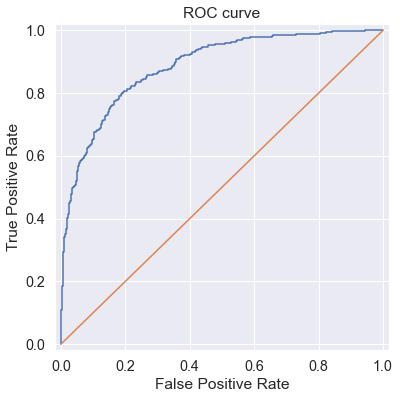

In [570]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid_cb, ctb.predict_proba(X_valid_cb)[:,1], pos_label=1)

sns.set(font_scale=1.3)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve');

Обучим модель на всех данных, увеличив количество итераций по сравнению с лучшей моделью на валидации:

In [571]:
ctb_final = CatBoostClassifier(depth=6, iterations=1550, random_seed=18)
ctb_final.fit(X_train, y, plot=False, verbose=300)

Learning rate set to 0.017103
0:	learn: 0.6883351	total: 34.4ms	remaining: 53.3s
300:	learn: 0.4291970	total: 8.4s	remaining: 34.9s
600:	learn: 0.3760076	total: 16.6s	remaining: 26.3s
900:	learn: 0.3313026	total: 24.8s	remaining: 17.8s
1200:	learn: 0.2979549	total: 32.9s	remaining: 9.55s
1500:	learn: 0.2706362	total: 41s	remaining: 1.34s
1549:	learn: 0.2663332	total: 42.3s	remaining: 0us


Посмотрим на важность признаков в построенной модели:

In [572]:
# Функция вывода информации о важности признаков в построенной модели
def print_feat_imp(feat_names, feat_values, n_features=0, draw_bar=True, print_val=False):
    feat_imp = dict(zip(feat_names, feat_values))
    feat_dict = sorted(feat_imp.items(), key=lambda item: abs(item[1]), reverse=True)
    if not n_features:
        n_features = len(feat_values)
    if print_val:    
        { print('{}: {:.6f}'.format(k, v)) for k, v in feat_dict[:n_features] }
    if draw_bar:
        plt.figure(figsize=(10, 8));
        sns.set(font_scale=1.1)
        bar = sns.barplot(y=list(map(lambda x: x[0], feat_dict))[:n_features], \
            x=list(map(lambda x: x[1], feat_dict))[:n_features],
            orient='h');
        bar.set(title='Feature importance')

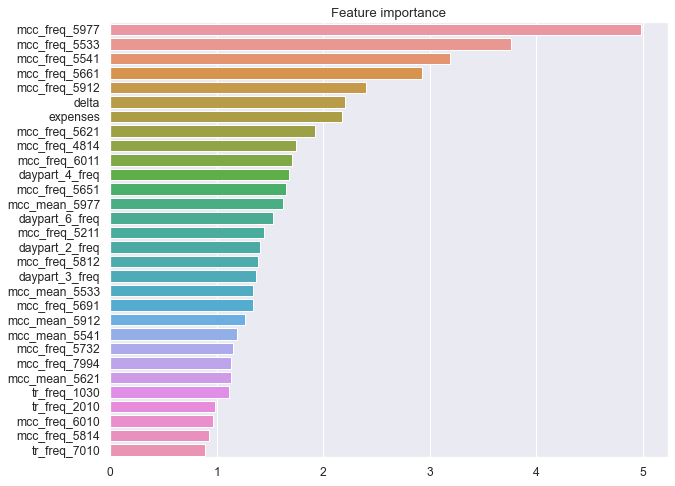

In [573]:
print_feat_imp(X_train.columns, ctb_final.get_feature_importance(), n_features=30)

Можем заметить, что наибольшее влияние на значение целевой переменной оказывает частота транзакций клиента с MCC-кодами:

- 5977: Магазины косметики
- 5533: Автозапчасти и аксессуары
- 5541: Станции техобслуживания
- 5661: Обувные магазины
- 5912: Аптеки

Полученная зависимость представляется вполне логичной.

Кроме того, очевидно влияние на целевую переменную общего уровня доходов и расходов клиента. Также прослеживается влияние распределения частоты транзакций клиента по времени суток.

In [574]:
proba_pred = ctb_final.predict_proba(X_test)[:, 1]

In [575]:
subm = pd.DataFrame()
subm['customer_id'] = data_test['customer_id']
subm['probability'] = proba_pred
subm.to_csv(PATH + 'submission_ctb.csv', index=False)

При различных значениях random_seed модель показывает **ROC AUC** до **0.88307**

Попробуем улучшить качество модели за счет построения ансамбля:

In [180]:
proba_ens = proba_pred.copy()
n_algs = 20
for i in range(n_algs-1):
    print("Iteration:", i+2)
    ctb_new = CatBoostClassifier(depth=6, iterations=1550, random_seed=42 + i*10 + 1)
    ctb_new.fit(X_train, y, plot=False, verbose=500)
    proba_ens += ctb_new.predict_proba(X_test)[:, 1]

Iteration: 1
Learning rate set to 0.017103
0:	learn: 0.6880938	total: 31.7ms	remaining: 49.1s
500:	learn: 0.3934657	total: 13.6s	remaining: 28.5s
1000:	learn: 0.3183289	total: 27s	remaining: 14.8s
1500:	learn: 0.2692749	total: 40.7s	remaining: 1.33s
1549:	learn: 0.2656170	total: 42.1s	remaining: 0us
Iteration: 2
Learning rate set to 0.017103
0:	learn: 0.6882546	total: 29.5ms	remaining: 45.7s
500:	learn: 0.3933218	total: 15.3s	remaining: 32.1s
1000:	learn: 0.3194498	total: 30.5s	remaining: 16.7s
1500:	learn: 0.2702803	total: 44.7s	remaining: 1.46s
1549:	learn: 0.2659558	total: 46.2s	remaining: 0us
Iteration: 3
Learning rate set to 0.017103
0:	learn: 0.6877154	total: 73.8ms	remaining: 1m 54s
500:	learn: 0.3926480	total: 15.8s	remaining: 33.1s
1000:	learn: 0.3195127	total: 30.4s	remaining: 16.6s
1500:	learn: 0.2706608	total: 46.5s	remaining: 1.52s
1549:	learn: 0.2664904	total: 48s	remaining: 0us
Iteration: 4
Learning rate set to 0.017103
0:	learn: 0.6878885	total: 52.8ms	remaining: 1m 21s

Сравним предсказание финальной модели с предсказаниями ансамбля:

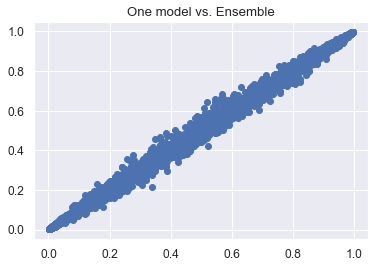

In [578]:
plt.title('One model vs. Ensemble')
plt.scatter(proba_ens / n_algs, proba_pred);

In [579]:
subm['probability'] = proba_ens / n_algs
subm.to_csv(PATH + 'subm_ctb_ens_20.csv', index=False)

С помощью ансамбля удалось получить **ROC AUC 0.88404**